In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
titlesize = 16
labelsize = 16
legendsize = 16
xticksize = 16
yticksize = xticksize

plt.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
plt.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
plt.rcParams['font.size'] = 12
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = labelsize
plt.rcParams['axes.titlesize'] = titlesize
plt.rcParams['figure.figsize'] = (10, 6)

plt.rc('xtick', labelsize=xticksize)
plt.rc('ytick', labelsize=yticksize)
plt.rc('legend', fontsize=legendsize)

# 1. Генерация данных

## 1.1. numpy.random

In [3]:
# равномерное распределение от 0 до 1
size = 5
np.random.rand(size)

array([0.87798961, 0.94622502, 0.58674479, 0.83935317, 0.54735299])

In [4]:
# равномерное целочисленное распределение
np.random.randint(1, 4, size)

array([3, 1, 1, 2, 1])

In [5]:
# нормальное распределение
np.random.normal(10, 5, size)

array([ 9.68579331, 14.07304299, 15.33746449,  4.26153732, 10.32939212])

## 1.2. scipy.stats

In [6]:
# нормальное распределение
stats.norm.rvs(10, 1, size)

array([ 9.07622973, 11.63960837, 10.32745435, 11.11788534, 11.96778624])

# 2. Информация о распределениях

## 2.1. Плотность распределения

Плотность распределения абсолютно непрерывной случайной величины обозначается как
$$
    f(x) = F'(x)
$$

Выразим вероятность попадания величины $X$ на отрезок от $a$ до $b$ через плотность распределения
$$
    P(a < X < b) = \int_a^b f(x) dx
$$

In [7]:
stats.norm.pdf(10, loc=10, scale=3)

0.1329807601338109

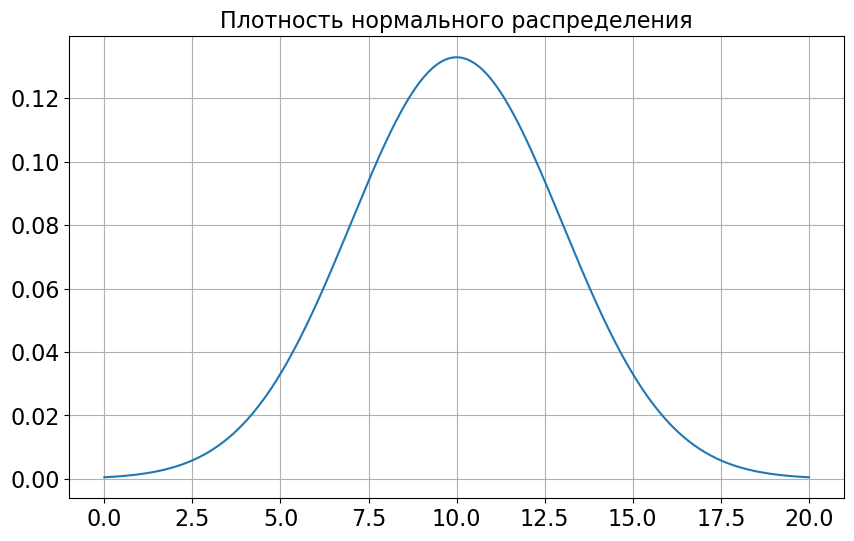

In [8]:
X = np.linspace(0, 20, 1000)
Y = [stats.norm.pdf(x, loc=10, scale=3) for x in X]
plt.plot(X, Y)
plt.title('Плотность нормального распределения')
plt.grid()
plt.show()

## 2.2. Функция распределения

$$F_X(x) = P(X < x)$$

Выразим вероятность попадания величины $X$ на отрезок от $a$ до $b$ через функцию распределения
$$
    P(a < X < b) = F(b) - F(a)
$$

In [9]:
stats.norm.cdf(1.96) - stats.norm.cdf(-1.96)

0.950004209703559

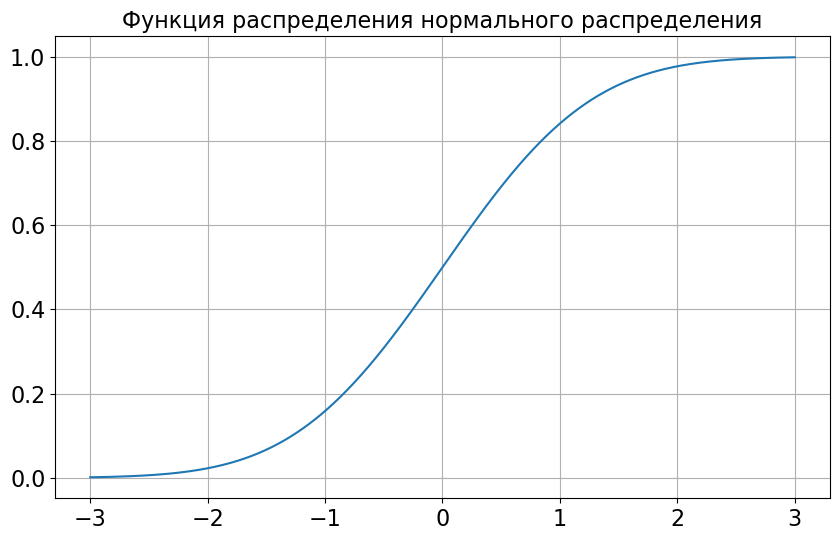

In [10]:
X = np.linspace(-3, 3, 1000)
Y = [stats.norm.cdf(x) for x in X]
plt.plot(X, Y)
plt.title('Функция распределения нормального распределения')
plt.grid()
plt.show()

## 2.3. Обратная функция распределения
Percent point function (inverse of `cdf`)

In [11]:
stats.norm.ppf(0.2)

-0.8416212335729142

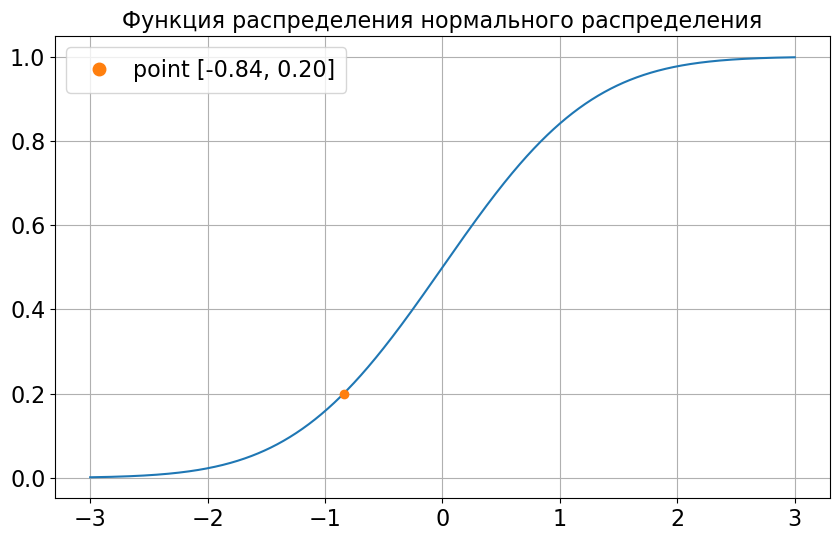

In [12]:
X = np.linspace(-3, 3, 1000)
Y = [stats.norm.cdf(x) for x in X]

cdf_y = 0.2
cdf_x = stats.norm.ppf(cdf_y)

plt.plot(X, Y)
plt.plot([cdf_x], [cdf_y], 'o', label=f'point [{cdf_x:0.2f}, {cdf_y:0.2f}]')
plt.title('Функция распределения нормального распределения')
plt.legend()
plt.grid()
plt.show()

## 2.4. Эмпирическая функция распределения

$X_1,\ldots,X_n\sim F$ — выборка независимых одинаково распределённых случайных величин.

Эмпирическая функция распределения $\hat{F}_n$ имеет вид
$$\hat{F}_n = \frac{\sum\limits_{i=1}^n I(X_i \leq x)}{n}$$
где

$$
I(X_i\leq x)=
\left\{
    \begin{aligned}
        1, X_i \leq x \\
        0, X_i > x
    \end{aligned}
\right. 
$$

#### Свойства ЭФР

\begin{align*}
    bias &= \mathbb{E}(\hat{F}_n (x)) - F(x) = 0, \\
    \mathbb{V}(\hat{F}_n (x)) &= \frac{F(x) \left(1-F(x)\right)}{n}, \\
    MSE &= \frac{F(x) \left(1-F(x)\right)}{n} + bias^2 \overset{n\to \infty}{\to} 0, \\
    \hat{F}_n (x) &\overset{P}{\to} F(x)
\end{align*}


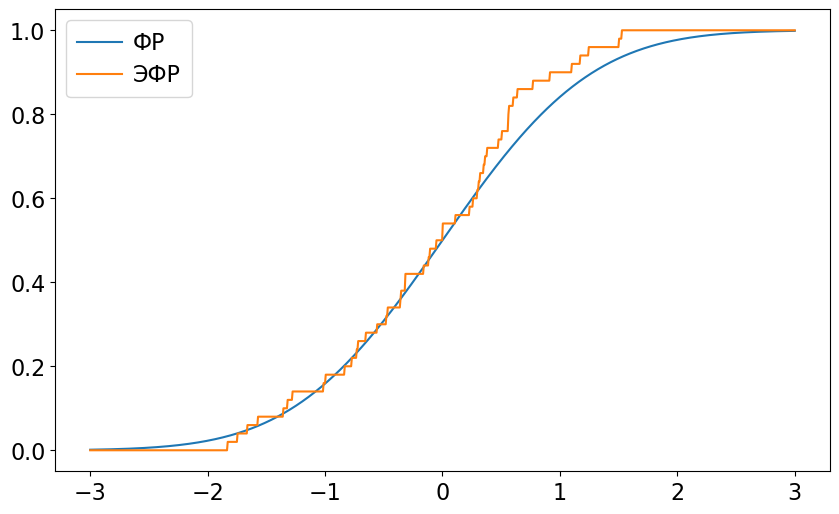

In [13]:
data = np.random.normal(size=50)
ecdf_Y = [np.mean(data < x) for x in X]

plt.plot(X, Y, label='ФР')
plt.plot(X, ecdf_Y, label='ЭФР')
plt.legend()
plt.show()

# 3. Точечные оценки
## Оценка среднего значения
Выборочное среднее

In [14]:
mean = 1
data = np.random.normal(mean, 1, 1000)
estimated_mean = np.mean(data)
print(f'mean = {mean}')
print(f'estimated_mean = {estimated_mean:0.3f}')

mean = 1
estimated_mean = 1.006


## Оценка стандартного отклонения

In [15]:
std = 1
data = np.random.normal(1, std, 1000)
estimated_std = np.std(data)
print(f'std = {std}')
print(f'estimated_std = {estimated_std:0.3f}')

std = 1
estimated_std = 1.041


# 4. Свойства оценок
## 4.1. Несмещённость

$\hat{\theta}$ или $\hat{\theta}_n$ — оценка параметра $\theta$.

$\hat{\theta}_n = g(X_1,\ldots,X_n)$ — случайная величина, т.к. зависит от данных.


Оценка $\hat{\theta}_n$ **несмещённая**, если $\mathbb{E}(\hat{\theta}_n) = \theta$.


### Пример

$X_1,\ldots,X_n\sim F$, покажем, что $\overline{X}$ является несмещённой оценкой $\mathbb{E} X = m$.

$\displaystyle \mathbb{E} \hat{m} = \mathbb{E} \left( \frac1n \sum_{i=1}^n X_i  \right) = \frac1n \sum_{i=1}^n \mathbb{E} X_i = \frac1n \sum_{i=1}^n m = \frac{ n m}{n}= m$


In [16]:
mean = 10
size = 100
data = np.random.normal(mean, 1, size)
estimated_mean = np.mean(data)

print(f'estimated_mean = {estimated_mean:0.3f}')

estimated_mean = 10.154


Доверительный интервал для среднего средних

In [17]:
n = 100000
means = np.random.normal(mean, 1, (n, size)).mean(axis=1)
mean_means = np.mean(means)
std_means = np.std(means) / n ** 0.5

print(mean_means - 1.96 * std_means, mean_means + 1.96 * std_means)

9.999492285003774 10.000734369761163


## 4.2. Состоятельность

Сходимость по вероятности: $\forall \epsilon>0$ выполняется $\mathbb{P}(|\hat{\theta}_n - \theta|>\epsilon)\overset{n\to \infty}{\to} 0$.

Оценка $\hat{\theta}_n$ **состоятельная**, если $\hat{\theta}_n \overset{\mathbb{P}}{\to} \theta$.

### Пример

Дана выборка независимых одинаково распределённых случайных величин $X_1,\ldots,X_n\sim F$. Покажем, что оценка математического ожидания $\displaystyle \hat{\theta}=\dfrac{1}{n}\sum_i X_i$ является состоятельной.

$$\mathbb{V}(\hat{\theta})=\mathbb{V}\left(\dfrac{1}{n}\sum_i X_i\right) = \dfrac{1}{n^2}\mathbb{V}\left(\sum_i X_i\right) = \dfrac{1}{n^2}n\sigma^2 = \dfrac{\sigma^2}{n}$$

Неравенство Чебышёва
$\mathbb{P}(|\hat{\theta}-\theta|>\epsilon)\leq \dfrac{\mathbb{V}(\hat{\theta})}{\epsilon^2}$. Получаем
$$\mathbb{P}(|\hat{\theta}-\theta|>\epsilon)\leq \dfrac{\sigma^2}{n \epsilon^2} \to 0, \ n\to \infty$$


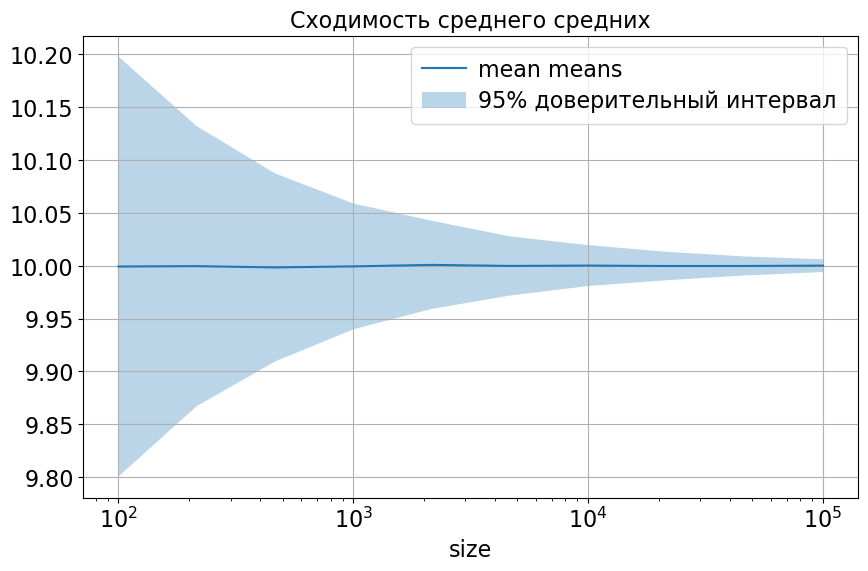

In [18]:
sizes = np.logspace(2, 5, 10).astype(int)

mean_means = []
std_means = []
for size_ in sizes:
    means_ = []
    for _ in range(1000):
        data_ = np.random.normal(mean, 1, size_)
        means_.append(np.mean(data_))
    mean_means.append(np.mean(means_))
    std_means.append(np.std(means_))

lower_bounds = []
upper_bounds = []
for mean_, std_ in zip(mean_means, std_means):
    lower_bounds.append(mean_ - 1.96 * std_)
    upper_bounds.append(mean_ + 1.96 * std_)

plt.plot(sizes, mean_means, label='mean means')
plt.fill_between(sizes, lower_bounds, upper_bounds, alpha=0.3, label='95% доверительный интервал')
plt.xscale('log')
plt.title('Сходимость среднего средних')
plt.xlabel('size')
plt.legend()
plt.grid()
plt.show()

# 4.3. Три варианта оценки среднего

$ \hat{m}_1 = \dfrac{X_1 + \ldots + X_n}{n} $

$ \hat{m}_2 = min(X_1, ..., X_n) $

$ \hat{m}_3 = X_1 $

#### Покажем, что $\hat{m}_2$ не несмещённая оценка

In [19]:
n = 100000
mean = 10

mins = np.random.normal(mean, 1, (n, size)).min(axis=1)
mean_mins = np.mean(mins)
std_mins = np.std(mins) / n ** 0.5

print(mean_mins - 1.96 * std_mins, mean_mins + 1.96 * std_mins)

7.488605390199111 7.493925698825934


#### Покажем, что $\hat{m}_3$ несмещённая оценка

In [20]:
n = 100000
mean = 10

mins = np.random.normal(mean, 1, (n, size))[:, 0]
mean_mins = np.mean(mins)
std_mins = np.std(mins) / n ** 0.5

print(mean_mins - 1.96 * std_mins, mean_mins + 1.96 * std_mins)

9.995195916779824 10.007568646570576


#### Покажем, что $\hat{m}_3$ не состоятельная оценка

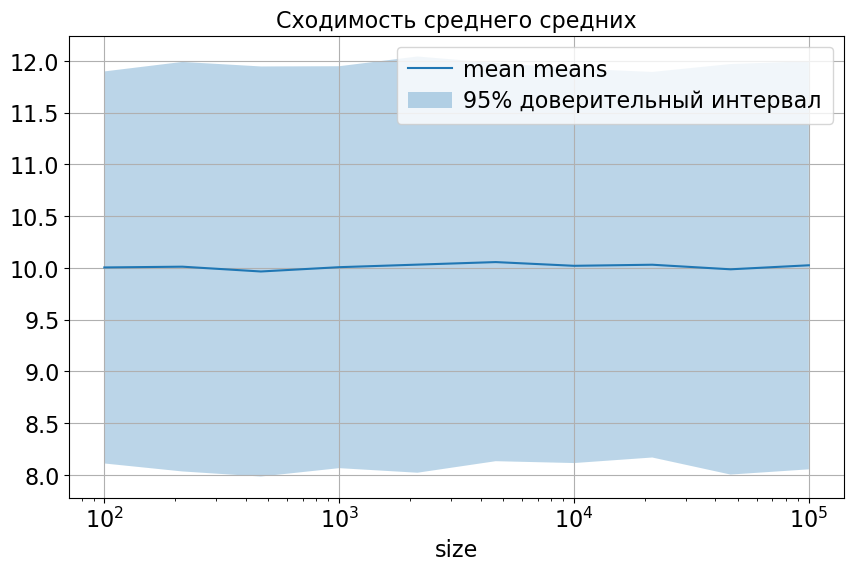

In [21]:
sizes = np.logspace(2, 5, 10).astype(int)

mean_means = []
std_means = []
for size_ in sizes:
    means_ = []
    for _ in range(1000):
        data_ = np.random.normal(mean, 1, size_)
        means_.append(data_[0])
    mean_means.append(np.mean(means_))
    std_means.append(np.std(means_))

lower_bounds = []
upper_bounds = []
for mean_, std_ in zip(mean_means, std_means):
    lower_bounds.append(mean_ - 1.96 * std_)
    upper_bounds.append(mean_ + 1.96 * std_)

plt.plot(sizes, mean_means, label='mean means')
plt.fill_between(sizes, lower_bounds, upper_bounds, alpha=0.3, label='95% доверительный интервал')
plt.xscale('log')
plt.title('Сходимость среднего средних')
plt.xlabel('size')
plt.legend()
plt.grid()
plt.show()

# 5. Данные пиццерии

С помощью **pandas** можно удобно работать с табличными данными.

In [22]:
import os
import pandas as pd

In [23]:
URL_BASE = 'https://raw.githubusercontent.com/ab-courses/simulator-ab-datasets/main/2022-04-01/'

def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))

In [24]:
df_sales = read_database('2022-04-01T12_df_sales.csv')
df_web_logs = read_database('2022-04-01T12_df_web_logs.csv')

df_sales['date'] = pd.to_datetime(df_sales['date'])
df_web_logs['date'] = pd.to_datetime(df_web_logs['date'])

df_sales - информация о покупках, одна строка - один заказ. Атрибуты:
- sale_id - идентификатор покупки;
- date - дата покупки;
- count_pizza - количество пицц в заказе;
- count_drink - количество напитков в заказе;
- price - стоимость заказа;
- user_id - идентификатор пользователя;

df_web_logs - талица с логами посещения сайта. Атрибуты:
- user_id - идентификатор пользователя;
- page - какая страница сайта была открыта. Типы страниц:
  - m - страница с меню;
  - b - страница с корзиной и подтверждением заказа;
  - p - страница с оплатой заказа;
- date - дата открытия страницы;
- load_time - время загрузки страницы в миллисекундах.

In [25]:
df_sales.head()

,sale_id,date,count_pizza,count_drink,price,user_id
0,1000001,2022-02-04 10:00:24,1,0,720,1c1543
1,1000002,2022-02-04 10:02:28,1,1,930,a9a6e8
2,1000003,2022-02-04 10:02:35,3,1,1980,23420a
3,1000004,2022-02-04 10:03:06,1,1,750,3e8ed5
4,1000005,2022-02-04 10:03:23,1,1,870,cbc468


In [26]:
df_web_logs.head()

,user_id,page,date,load_time
0,f25239,m,2022-02-03 23:45:37,80.8
1,06d6df,m,2022-02-03 23:49:56,70.5
2,06d6df,m,2022-02-03 23:51:16,89.7
3,f25239,m,2022-02-03 23:51:43,74.4
4,697870,m,2022-02-03 23:53:12,66.8


In [27]:
# среднее по столбцу
df_sales['price'].mean()

1206.014363713962

In [28]:
# фильтрация данных
df_sales[df_sales['user_id'] == '1c1543']

,sale_id,date,count_pizza,count_drink,price,user_id
0,1000001,2022-02-04 10:00:24,1,0,720,1c1543
77722,1077723,2022-02-25 14:07:20,1,0,720,1c1543
163390,1163391,2022-03-20 18:16:03,1,0,720,1c1543


In [29]:
# группировка данных
df_sales.groupby('user_id')['price'].count()

user_id
000096    2
0000d4    2
0000de    3
0000e4    2
000112    1
         ..
fffc97    1
fffcab    2
fffd64    1
ffff62    1
ffff8f    2
Name: price, Length: 99778, dtype: int64

In [30]:
# проверим что у пользователя '1c1543' действительной 3 покупки
df_sales.groupby('user_id')['price'].count()['1c1543']

3

### Объединение таблиц

Как часто пользователь заходит на сайт и ничего не покупает в этот день?

In [31]:
df_web_logs.head()

,user_id,page,date,load_time
0,f25239,m,2022-02-03 23:45:37,80.8
1,06d6df,m,2022-02-03 23:49:56,70.5
2,06d6df,m,2022-02-03 23:51:16,89.7
3,f25239,m,2022-02-03 23:51:43,74.4
4,697870,m,2022-02-03 23:53:12,66.8


In [32]:
# добавляем столбец с датой без времени
df_web_logs['day'] = df_web_logs['date'].dt.date
df_sales['day'] = df_sales['date'].dt.date

In [33]:
df_web_logs.head(2)

,user_id,page,date,load_time,day
0,f25239,m,2022-02-03 23:45:37,80.8,2022-02-03
1,06d6df,m,2022-02-03 23:49:56,70.5,2022-02-03


In [34]:
# делаем таблицы с уникальными парами человек-дата
user_day_web = df_web_logs[['user_id', 'day', 'page']].groupby(['user_id', 'day'])[['page']].count()
user_day_sale = df_sales[['user_id', 'day', 'price']].groupby(['user_id', 'day'])[['price']].sum()

In [35]:
len(user_day_web), len(user_day_sale)

(303127, 203155)

In [36]:
user_day_web.head()

page
user_id day             
000096  2022-03-04     8
        2022-03-22     7
0000d4  2022-02-28     9
        2022-03-27    10
0000de  2022-02-11     6

In [37]:
user_day_sale.head()

price
user_id day              
000096  2022-03-04    720
        2022-03-22    720
0000d4  2022-02-28    720
        2022-03-27    720
0000de  2022-02-11    660

In [38]:
# соединяем таблицы
df_join = pd.merge(
    user_day_web,
    user_day_sale,
    left_index=True,
    right_index=True,
    how='outer'
)

In [39]:
df_join

page   price
user_id day                     
000096  2022-03-04     8   720.0
        2022-03-22     7   720.0
0000d4  2022-02-28     9   720.0
        2022-03-27    10   720.0
0000de  2022-02-11     6   660.0
...                  ...     ...
ffff18  2022-02-21     3     NaN
        2022-03-28     4     NaN
ffff62  2022-03-19     8  2220.0
ffff8f  2022-02-05    12  2220.0
        2022-02-13     8   600.0

[303127 rows x 2 columns]

In [40]:
# считаем доли нулей в столбцах
df_join.isnull().mean()

page     0.000000
price    0.329802
dtype: float64

**Вывод:** 
- Если делал покупку, то заходил на сайт в этот день;
- Если заходил на сайт, то не обязательно покупал;
- Доля человеко-дней без покупок 33%.